In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/kimginam/Kaggle/DATA/multipleChoiceResponses.csv', encoding = "ISO-8859-1")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


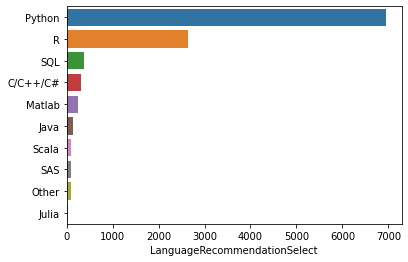

In [7]:
s = df['LanguageRecommendationSelect'].value_counts().head(10)
sns.barplot(y=s.index, x=s)